<a href="https://colab.research.google.com/github/onlygoodman/MLDLpractice/blob/master/sentiment_predict_model_try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 68.9 MB/s 


In [4]:
data = pd.read_csv('./ChatbotData.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       11823 non-null  object
 1   A       11823 non-null  object
 2   label   11823 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.2+ KB


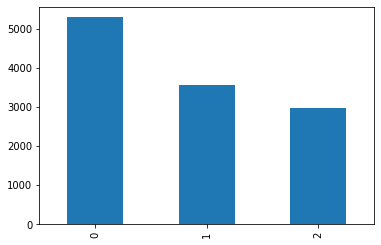

In [5]:
#label 별 데이터 분포
data['label'].value_counts().plot(kind = 'bar')

In [6]:
data.loc[data['label'] == 2, 'label'] = 1

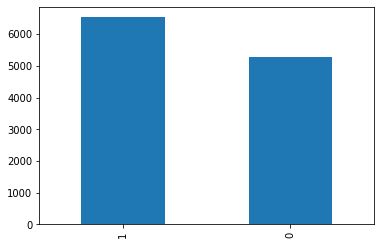

In [7]:
#label 별 데이터 분포
data['label'].value_counts().plot(kind = 'bar')

In [8]:
data['Q']=data['Q'].str.replace("[^0-9ㄱ-ㅎㅏ-ㅣ가-힣]",'')
data[:5]

#숫자는 유지하여 전처리

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,Q,A,label
0,12시땡,하루가 또 가네요.,0
1,1지망학교떨어졌어,위로해 드립니다.,0
2,3박4일놀러가고싶다,여행은 언제나 좋죠.,0
3,3박4일정도놀러가고싶다,여행은 언제나 좋죠.,0
4,심하네,눈살이 찌푸려지죠.,0


In [9]:
# data['Q']=data['Q'].str.replace('^ +', "")
# data['Q'].replace("", np.nan, inplace=True)

In [10]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를', '으로','자','에','와','한','하다']

In [13]:
okt=Okt()
X_train = []
for sentence in tqdm(data['Q']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 11823/11823 [00:43<00:00, 268.78it/s]


In [14]:
tokenizer= Tokenizer()
tokenizer.fit_on_texts(X_train)

In [15]:
tokenizer.word_index

{'좋아하다': 1,
 '사람': 2,
 '같다': 3,
 '을': 4,
 '너무': 5,
 '보다': 6,
 '좋다': 7,
 '나': 8,
 '없다': 9,
 '내': 10,
 '헤어지다': 11,
 '있다': 12,
 '사랑': 13,
 '되다': 14,
 '하': 15,
 '한테': 16,
 '돼다': 17,
 '이별': 18,
 '연락': 19,
 '썸': 20,
 '친구': 21,
 '먹다': 22,
 '어떻다': 23,
 '오늘': 24,
 '남자': 25,
 '가다': 26,
 '오다': 27,
 '뭐': 28,
 '만나다': 29,
 '만': 30,
 '여자친구': 31,
 '남자친구': 32,
 '에서': 33,
 '랑': 34,
 '이다': 35,
 '생각': 36,
 '다': 37,
 '하고': 38,
 '마음': 39,
 '타다': 40,
 '짝남': 41,
 '여자': 42,
 '싶다': 43,
 '힘들다': 44,
 '알다': 45,
 '안': 46,
 '받다': 47,
 '인데': 48,
 '연애': 49,
 '왜': 50,
 '지': 51,
 '끄다': 52,
 '힘드다': 53,
 '못': 54,
 '해': 55,
 '모르다': 56,
 '고': 57,
 '너': 58,
 '애': 59,
 '많다': 60,
 '면': 61,
 '짝녀': 62,
 '게': 63,
 '않다': 64,
 '로': 65,
 '이랑': 66,
 '많이': 67,
 '일': 68,
 '결혼': 69,
 '중': 70,
 '자꾸': 71,
 '해주다': 72,
 '그': 73,
 '네': 74,
 '별': 75,
 '야': 76,
 '제': 77,
 '이야': 78,
 '시간': 79,
 '싫다': 80,
 '해보다': 81,
 '자다': 82,
 '들다': 83,
 '짝사랑': 84,
 '잊다': 85,
 '아니다': 86,
 '괜찮다': 87,
 '혼자': 88,
 '선물': 89,
 '아프다': 90,
 '진짜': 91,
 '후': 92,
 '그녀':

In [16]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5385
등장 빈도가 2번 이하인 희귀 단어의 수: 3271
단어 집합에서 희귀 단어의 비율: 60.74280408542248
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.14972863679898


In [17]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2115


In [18]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)

print(X_train[:3])

[[], [403, 300, 229], [175, 1378, 1036]]


In [19]:
data['Q'].head(5)

0            12시땡
1       1지망학교떨어졌어
2      3박4일놀러가고싶다
3    3박4일정도놀러가고싶다
4             심하네
Name: Q, dtype: object

In [20]:
y_train = np.array(data['label'])
y_test = np.array(data['label'])

In [21]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [22]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

11661
11661


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


문장 최대 길이 : 17
문장 평균 길이 : 3.6605779950261557


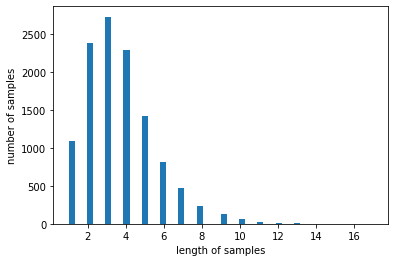

In [23]:
print('문장 최대 길이 :',max(len(review) for review in X_train))
print('문장 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [25]:
max_len = 8
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 8 이하인 샘플의 비율: 97.90755509819054


In [26]:
X_train = pad_sequences(X_train, maxlen=max_len)

In [27]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/50
145/146 [============================>.] - ETA: 0s - loss: 0.5118 - acc: 0.7455
Epoch 1: val_acc improved from -inf to 0.66781, saving model to best_model.h5
146/146 [==============================] - 10s 12ms/step - loss: 0.5116 - acc: 0.7455 - val_loss: 0.6289 - val_acc: 0.6678
Epoch 2/50
139/146 [===========================>..] - ETA: 0s - loss: 0.3454 - acc: 0.8532
Epoch 2: val_acc did not improve from 0.66781
146/146 [==============================] - 1s 6ms/step - loss: 0.3478 - acc: 0.8522 - val_loss: 0.7218 - val_acc: 0.6408
Epoch 3/50
140/146 [===========================>..] - ETA: 0s - loss: 0.3109 - acc: 0.8701
Epoch 3: val_acc did not improve from 0.66781
146/146 [==============================] - 1s 6ms/step - loss: 0.3105 - acc: 0.8700 - val_loss: 0.8011 - val_acc: 0.6429
Epoch 4/50
140/146 [===========================>..] - ETA: 0s - loss: 0.2914 - acc: 0.8754
Epoch 4: val_acc did not improve from 0.66781
146/146 [==============================] - 1s 6ms/step 

In [28]:
loaded_model = load_model('best_model.h5')

In [29]:
def sp(new_sentence):
  new_sentence = re.sub(r'[^0-9ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 부정 문장입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 긍정 문장입니다.\n".format((1 - score) * 100))

In [30]:
sp('아 노잼이네')

86.70% 확률로 부정 문장입니다.



In [31]:
sp('이거 너무좋은데 ')

90.60% 확률로 긍정 문장입니다.



In [32]:
sp("여자친구가 좋은데 믿음이 안 가")

93.53% 확률로 긍정 문장입니다.



In [33]:
sp('너가 사람이냐')

68.57% 확률로 긍정 문장입니다.



In [34]:
sp('사랑해')

97.53% 확률로 부정 문장입니다.

